In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data=pd.read_excel(r'E:\Case_study\iris.xls')

In [8]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


##### Missing Value

In [10]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [11]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [13]:
for i in['SL','SW','PL']:
    data[i]=data[i].fillna(data[i].mean())

In [14]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [15]:
data.head().round(2)

,SL,SW,PL,PW,Classification
0,5.10,3.5,1.4,0.2,Iris-setosa
1,4.90,3.0,1.4,0.2,Iris-setosa
2,5.86,3.2,1.3,0.2,Iris-setosa
3,4.60,3.1,1.5,0.2,Iris-setosa
4,5.00,3.6,1.4,0.2,Iris-setosa


##### Outlier

In [16]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='SW'>

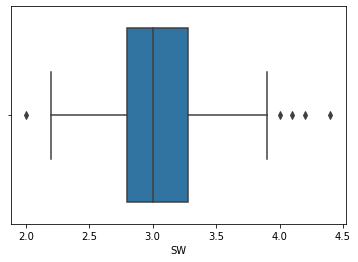

In [19]:
sns.boxplot(data['SW'])

In [20]:
Q1 = np.percentile(data['SW'],25,interpolation='midpoint')
Q2 = np.percentile(data['SW'],50,interpolation='midpoint')
Q3 = np.percentile(data['SW'],75,interpolation='midpoint')
IQR = Q3-Q1
low_limit = Q1-1.5*IQR     
up_limit = Q3 + 1.5*IQR
outlier = []
for x in data['SW']:
    if (x > up_limit) or (x < low_limit):
        outlier.append(x)
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [21]:
index=data['SW'][(data['SW']>up_limit)|(data['SW']<low_limit)].index
data.drop(index,inplace=True)

<AxesSubplot:xlabel='SW'>

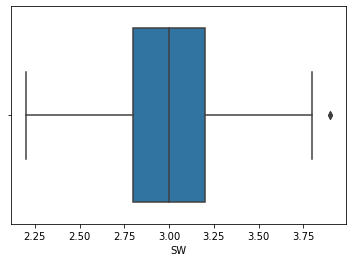

In [22]:
sns.boxplot(data['SW'])

<AxesSubplot:xlabel='SL'>

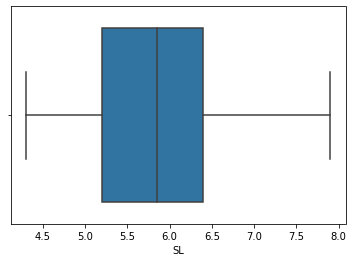

In [44]:
sns.boxplot(data['SL'])

<AxesSubplot:xlabel='PL'>

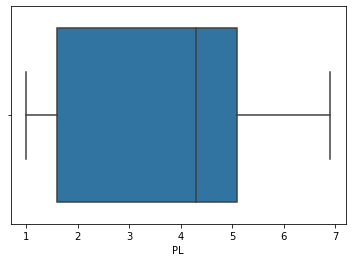

In [23]:
sns.boxplot(data['PL'])

<AxesSubplot:xlabel='PW'>

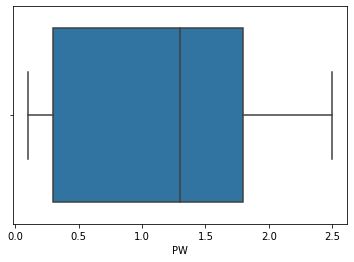

In [24]:
sns.boxplot(data['PW'])

In [ ]:
## There is outlier in SL,PL,PW columns

# Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### 1. Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.91      0.95        11
Iris-versicolor       0.80      0.89      0.84         9
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.90        29
      macro avg       0.90      0.90      0.89        29
   weighted avg       0.90      0.90      0.90        29

[[10  1  0]
 [ 0  8  1]
 [ 0  1  8]]
accuracy is 0.896551724137931


#### 2. K – Nearest Neighbour (KNN)

In [35]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.91      0.95        11
Iris-versicolor       0.89      0.89      0.89         9
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.93        29
      macro avg       0.93      0.93      0.93        29
   weighted avg       0.93      0.93      0.93        29

[[10  1  0]
 [ 0  8  1]
 [ 0  0  9]]
accuracy is 0.9310344827586207


#### 3.SVM (Support Vector Machines).

In [36]:
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.91      0.95        11
Iris-versicolor       0.80      0.89      0.84         9
 Iris-virginica       0.89      0.89      0.89         9

       accuracy                           0.90        29
      macro avg       0.90      0.90      0.89        29
   weighted avg       0.90      0.90      0.90        29

[[10  1  0]
 [ 0  8  1]
 [ 0  1  8]]
accuracy is 0.896551724137931


#### 4.decision trees

In [38]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        29
      macro avg       0.97      0.96      0.96        29
   weighted avg       0.97      0.97      0.97        29

[[11  0  0]
 [ 0  8  1]
 [ 0  0  9]]
accuracy is 0.9655172413793104


## random forest algorithm

In [39]:
from sklearn.ensemble import RandomForestClassifier


In [40]:
clf=RandomForestClassifier(n_estimators=100)

In [41]:
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [42]:
from sklearn import metrics

In [43]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9655172413793104
